In [1]:
import os
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1' # Set this too just in case

In [2]:
import json
import numpy as np
import torch as th
import motornet as mn
import pickle

In [3]:
from my_policy import Policy  # the RNN
from my_task import Gribble1999  # the task
from my_utils import (
    save_model,
    print_losses,
    plot_stuff,
    run_episode,
    test,
    plot_training_log,
    plot_simulations,
    plot_activation,
    plot_kinematics,
    xy_to_joints,
)  # utility functions

In [4]:
model_name = 'm0'

In [5]:
batch = 'scratch'

env = Gribble1999(effector=mn.effector.RigidTendonArm26(muscle=mn.muscle.RigidTendonHillMuscle()))

l1,l2,dt = env.skeleton.l1, env.skeleton.l2, env.dt

# Gribble & Ostry 1999 Experiment 1 (elbow only)

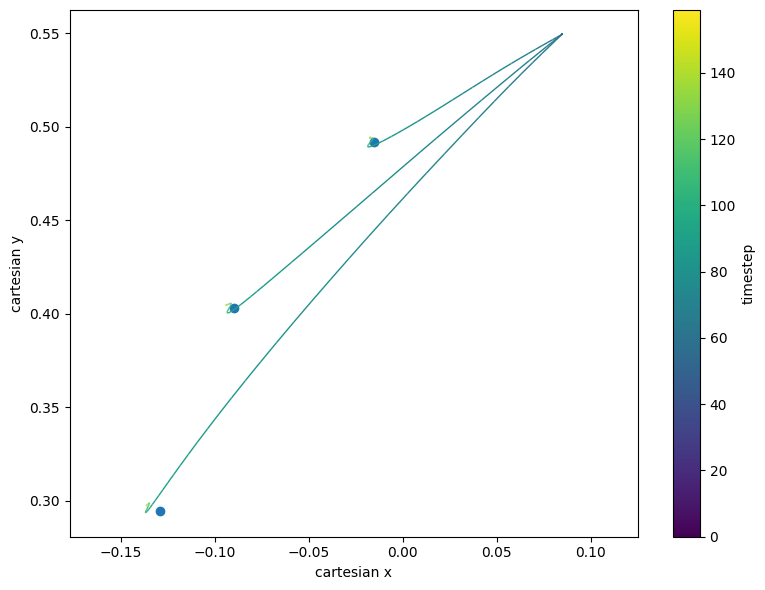

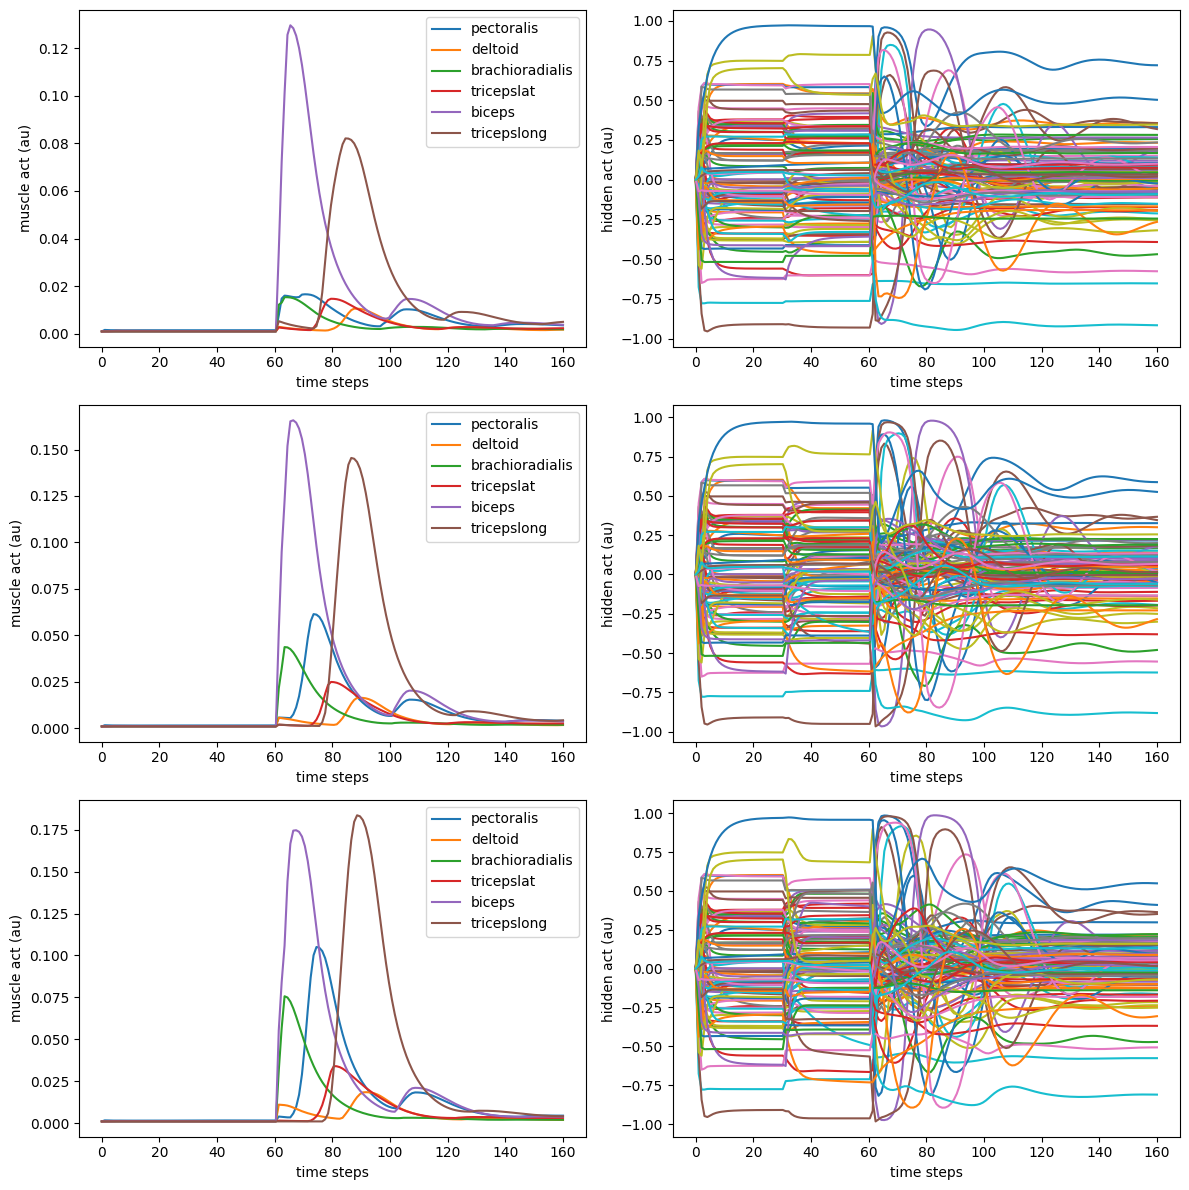

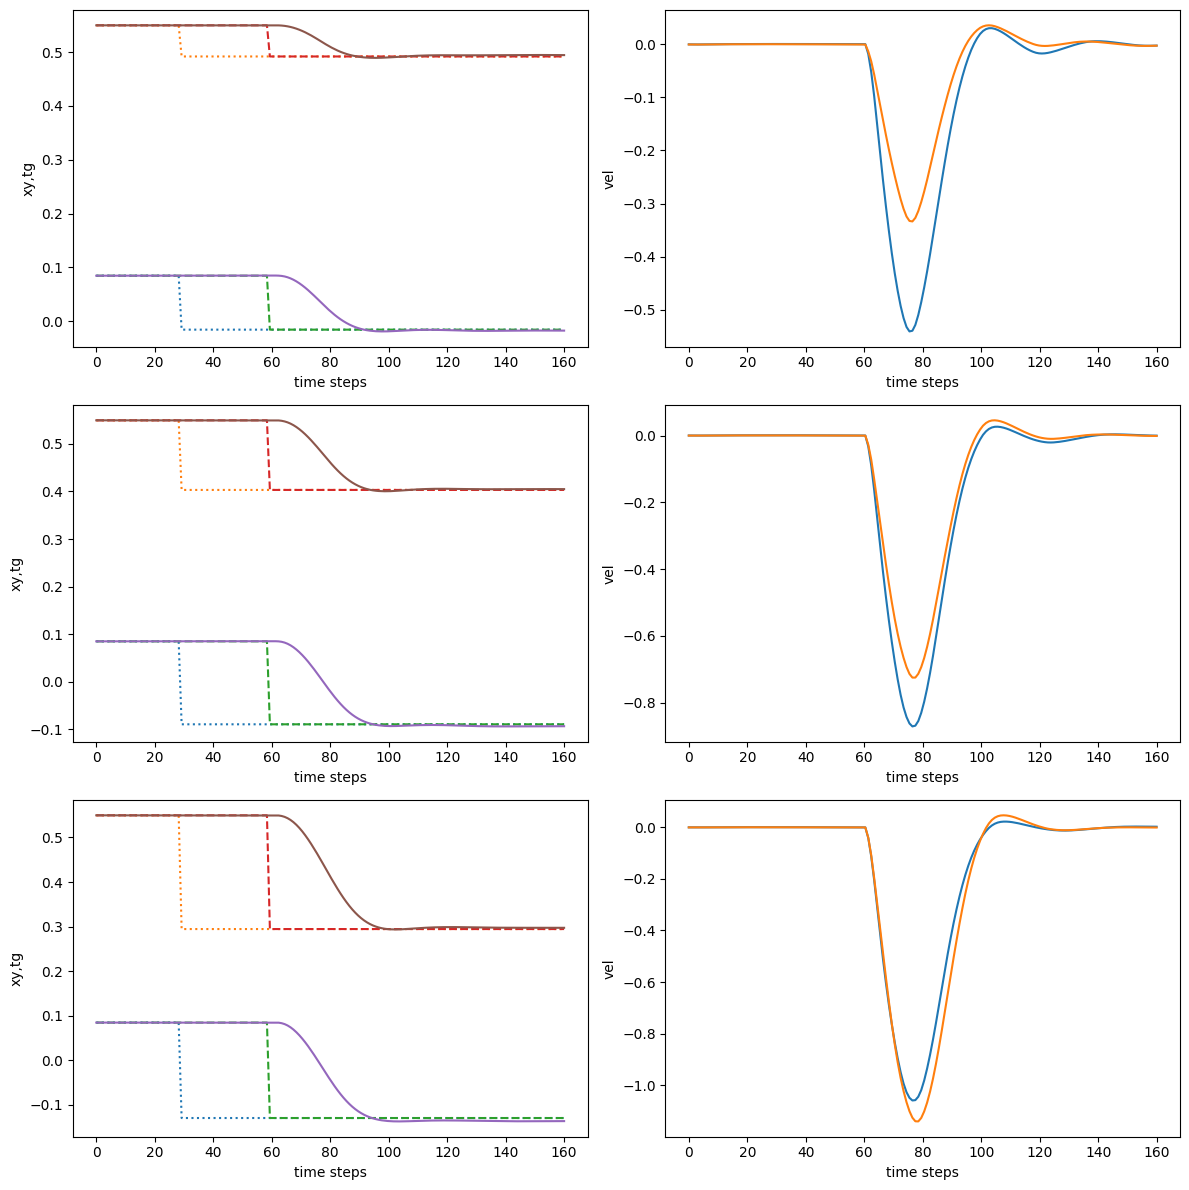

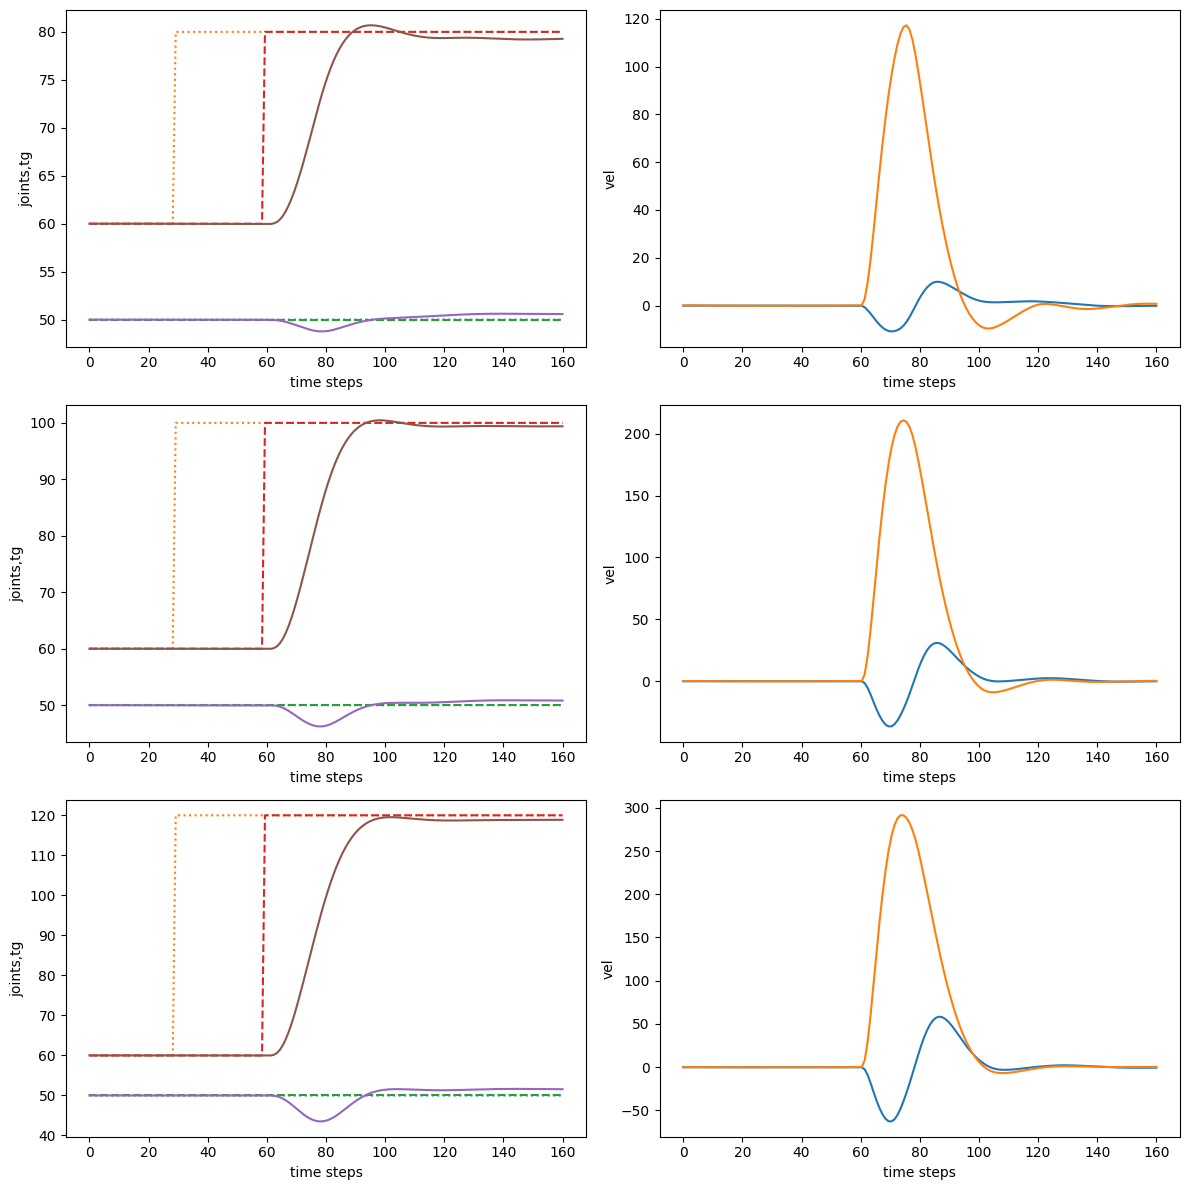

In [6]:
data, _ = test(
        "models/" + model_name + "/" + "cfg.json",
        "models/" + model_name + "/" + "weights",
        whichtest = 'test1',
)

fig, ax = plot_simulations(xy=data['xy'], target_xy=data['tg'], figsize=(8, 6))

fig, ax = plot_activation(data['all_hidden'], data['all_muscle'])

pre_tgt = data['obs'][:, :, [0,1]]
fig, ax = plot_kinematics(all_xy=data["xy"], all_tg=data["tg"], all_vel=data["vel"], pre_tgt=pre_tgt, y_label='xy,tg')

tg_j = xy_to_joints(data['tg'], l1, l2) * 180 / np.pi
vel_j = np.gradient(data['joint'][:,:,:2]*180/np.pi, axis=1) * 1/dt
pre_tgt = xy_to_joints(data['obs'][:, :, [0,1]], l1, l2) * 180 / np.pi
fig, ax = plot_kinematics(all_xy=data["joint"][:,:,:2]*180/np.pi, all_tg=tg_j, all_vel=vel_j, pre_tgt=pre_tgt, y_label='joints,tg')

# Gribble & Ostry 1999 Experiment 2 (shoulder only)

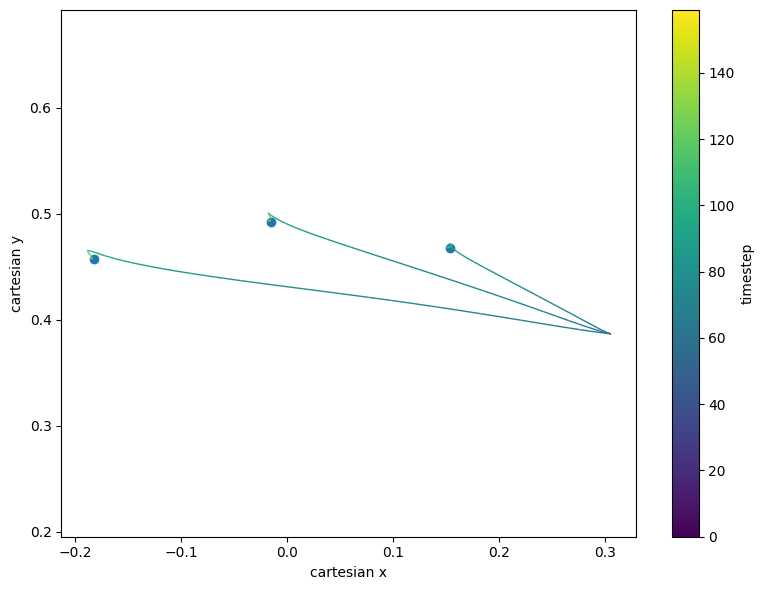

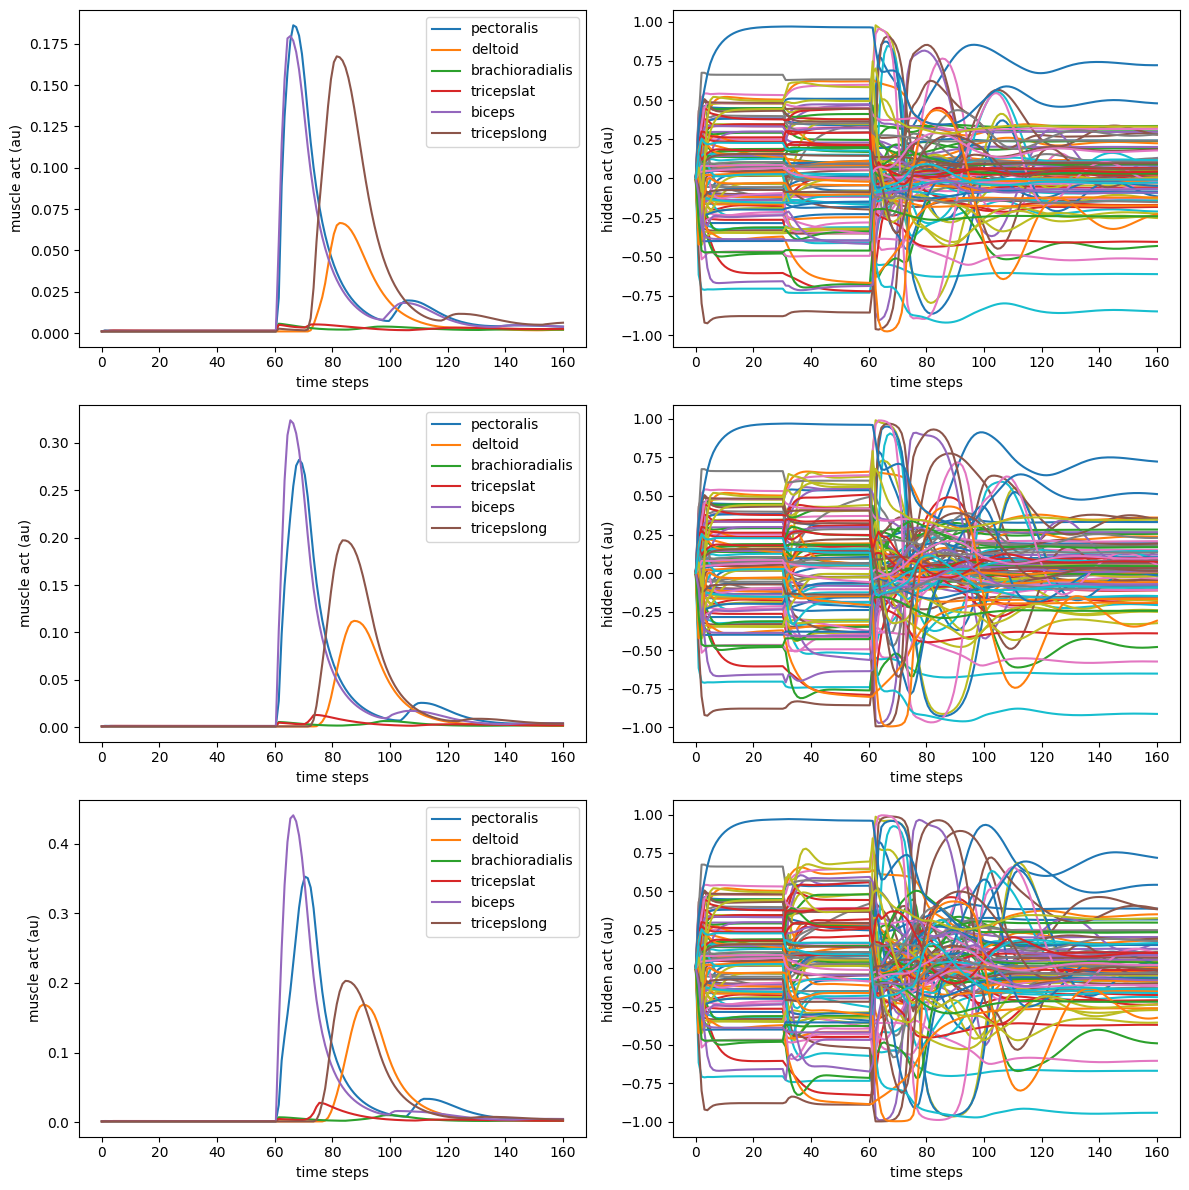

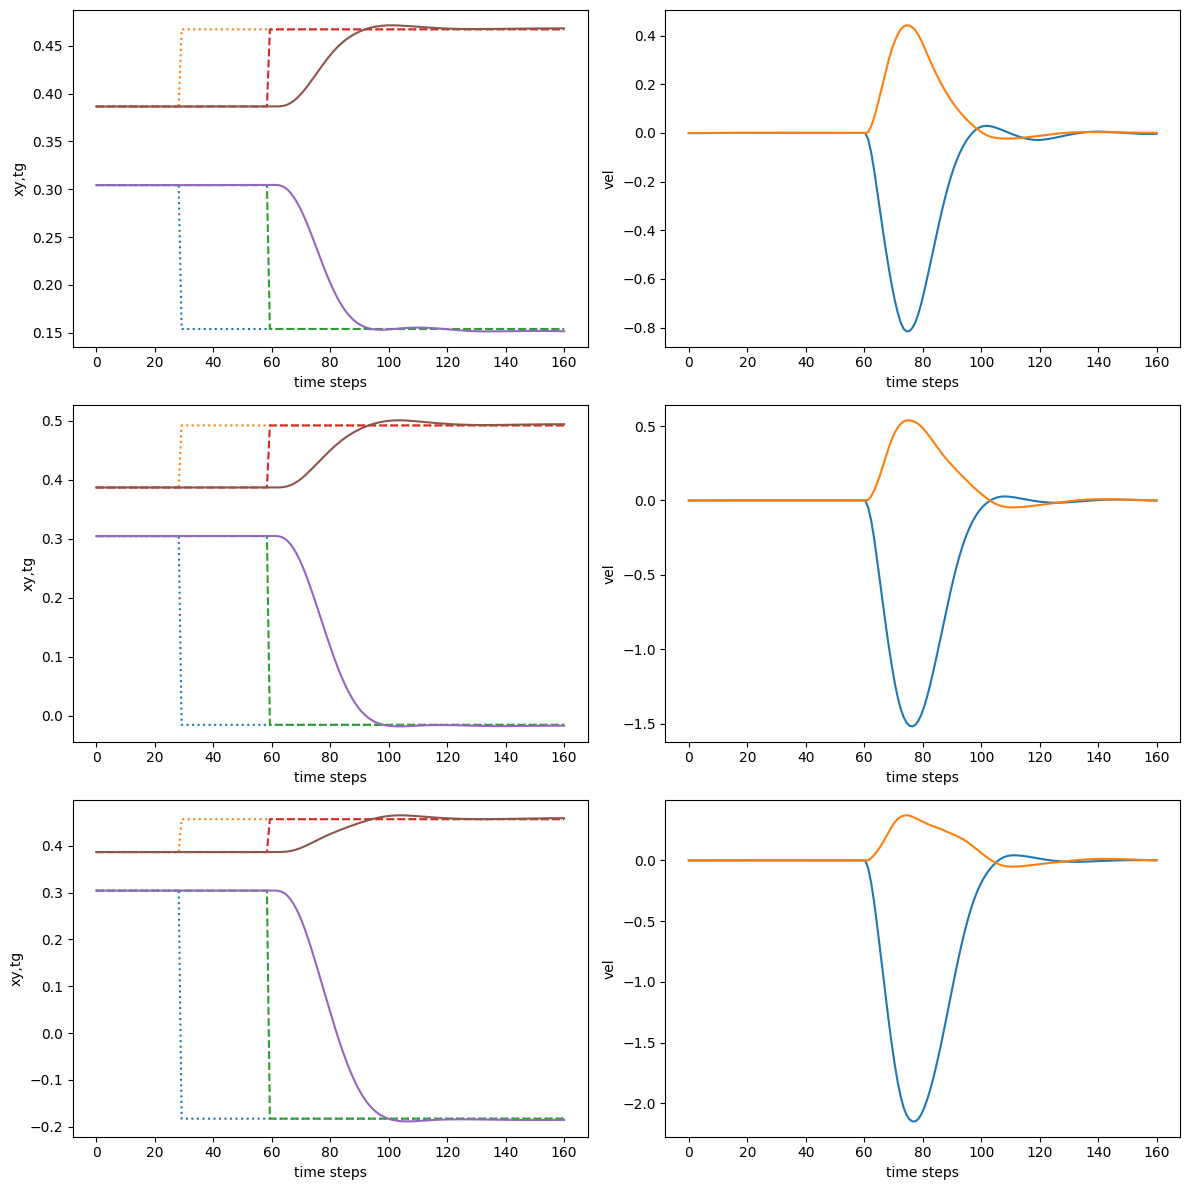

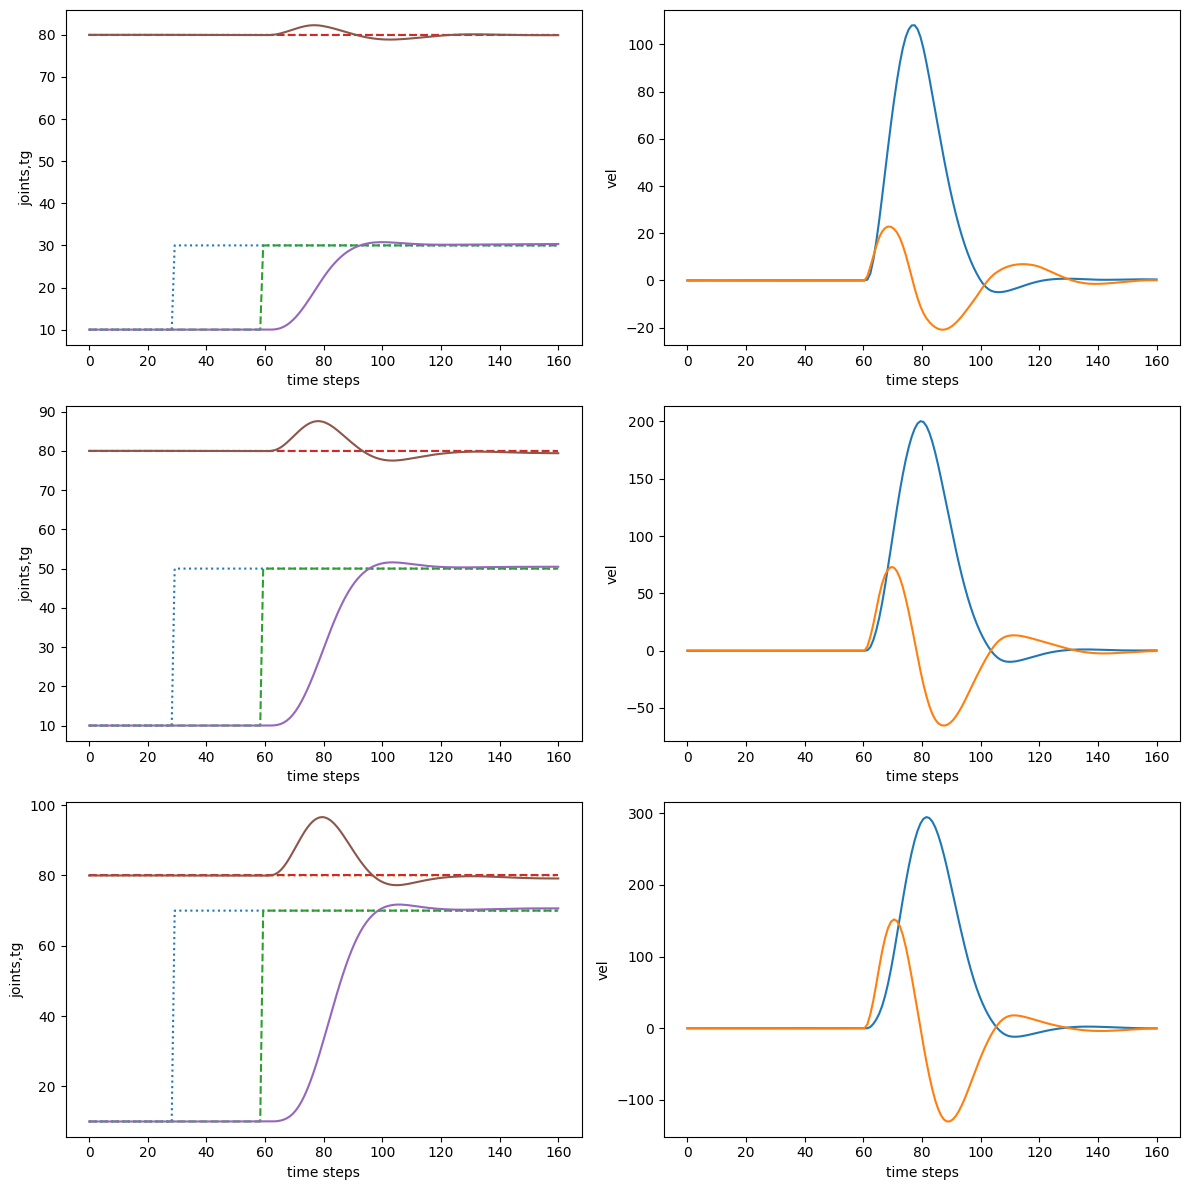

In [7]:
data, _ = test(
        "models/" + model_name + "/" + "cfg.json",
        "models/" + model_name + "/" + "weights",
        whichtest = 'test2',
)

fig, ax = plot_simulations(xy=data['xy'], target_xy=data['tg'], figsize=(8, 6))

fig, ax = plot_activation(data['all_hidden'], data['all_muscle'])

pre_tgt = data['obs'][:, :, [0,1]]
fig, ax = plot_kinematics(all_xy=data["xy"], all_tg=data["tg"], all_vel=data["vel"], pre_tgt=pre_tgt, y_label='xy,tg')

tg_j = xy_to_joints(data['tg'], l1, l2) * 180 / np.pi
vel_j = np.gradient(data['joint'][:,:,:2]*180/np.pi, axis=1) * 1/dt
pre_tgt = xy_to_joints(data['obs'][:, :, [0,1]], l1, l2) * 180 / np.pi
fig, ax = plot_kinematics(all_xy=data["joint"][:,:,:2]*180/np.pi, all_tg=tg_j, all_vel=vel_j, pre_tgt=pre_tgt, y_label='joints,tg')


# Gribble & Ostry 1999 Experiment 3 (elbow & shoulder)


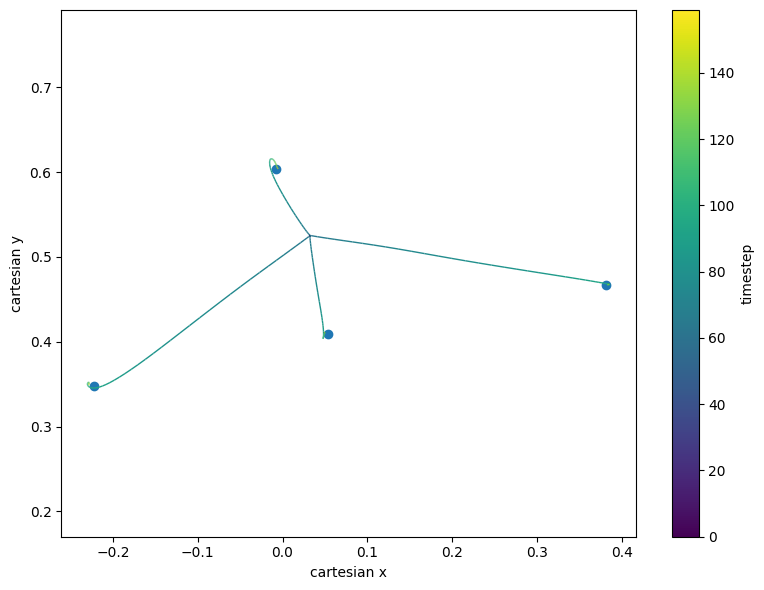

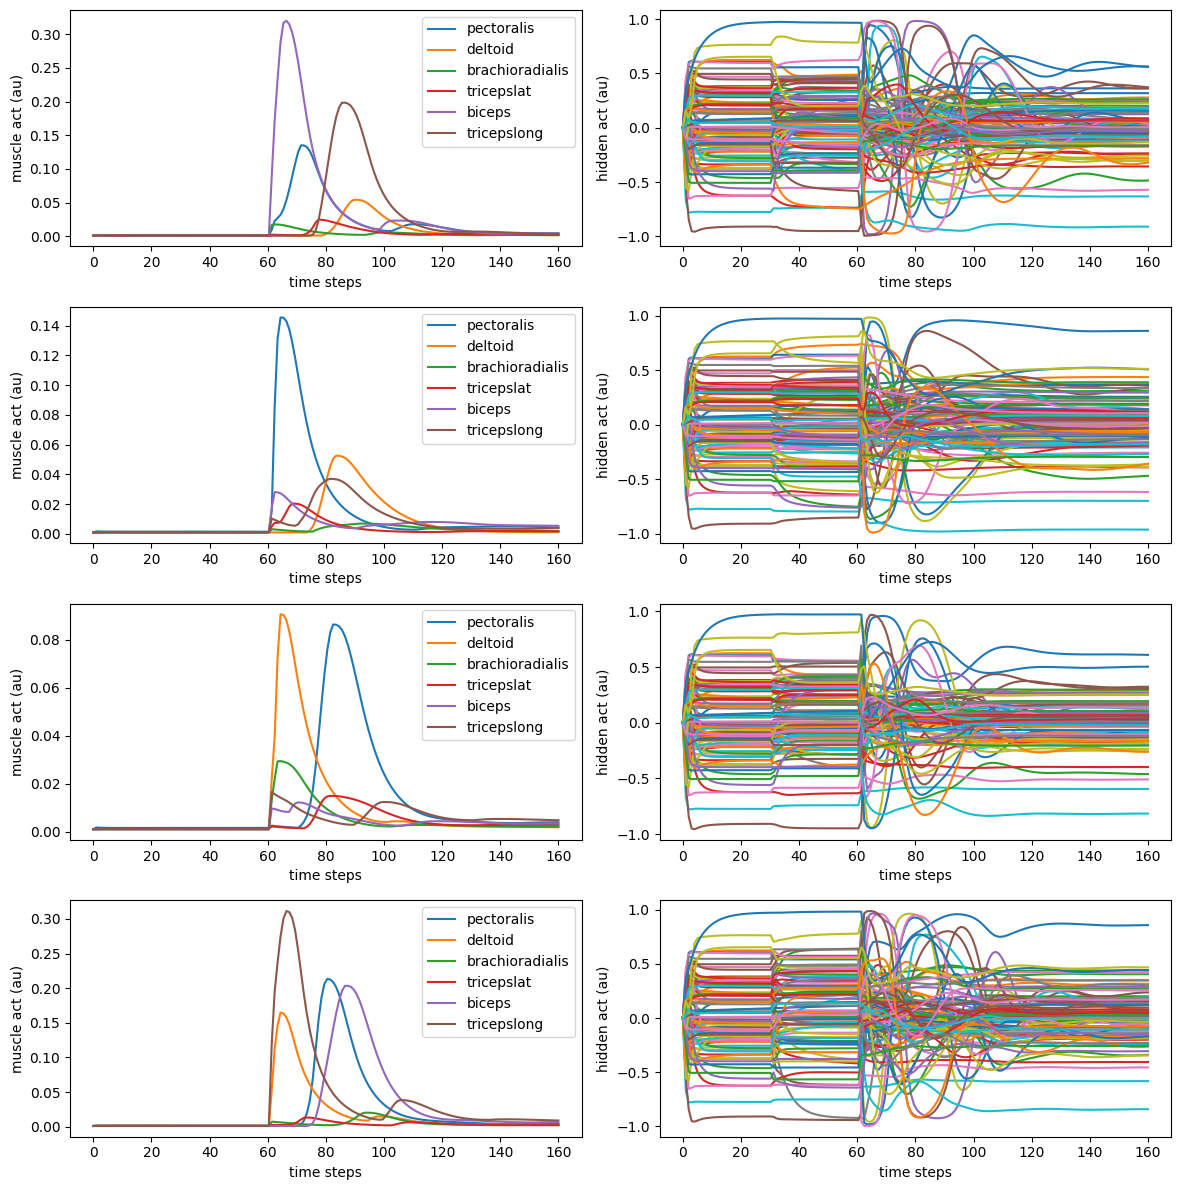

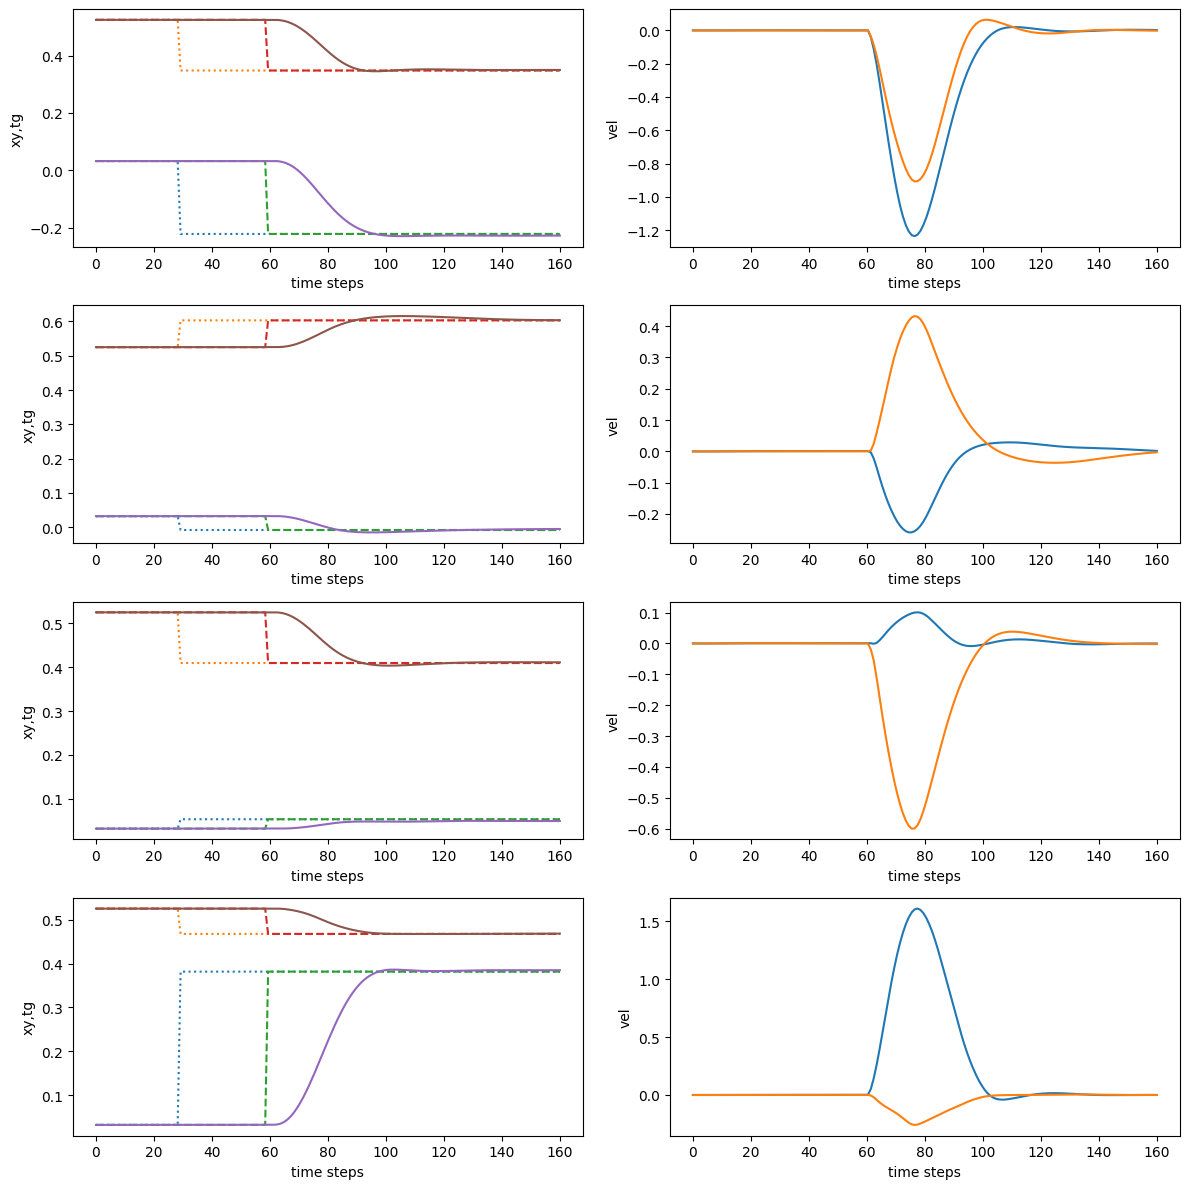

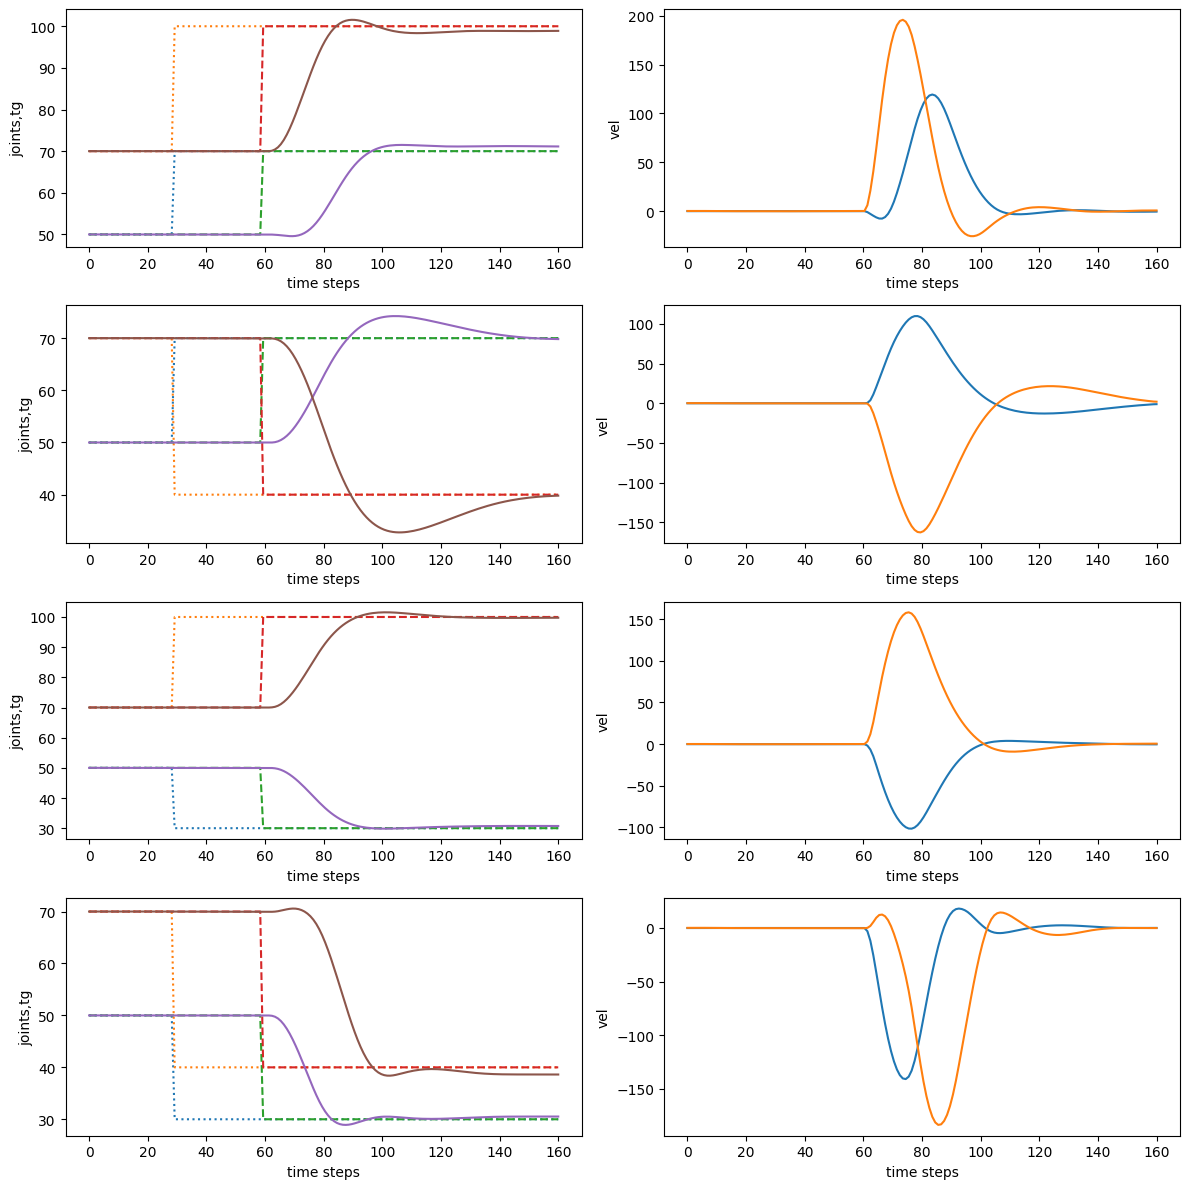

In [8]:
data, _ = test(
        "models/" + model_name + "/" + "cfg.json",
        "models/" + model_name + "/" + "weights",
        whichtest = 'test3',
)

fig, ax = plot_simulations(xy=data['xy'], target_xy=data['tg'], figsize=(8, 6))

fig, ax = plot_activation(data['all_hidden'], data['all_muscle'])

pre_tgt = data['obs'][:, :, [0,1]]
fig, ax = plot_kinematics(all_xy=data["xy"], all_tg=data["tg"], all_vel=data["vel"], pre_tgt=pre_tgt, y_label='xy,tg')

tg_j = xy_to_joints(data['tg'], l1, l2) * 180 / np.pi
vel_j = np.gradient(data['joint'][:,:,:2]*180/np.pi, axis=1) * 1/dt
pre_tgt = xy_to_joints(data['obs'][:, :, [0,1]], l1, l2) * 180 / np.pi
fig, ax = plot_kinematics(all_xy=data["joint"][:,:,:2]*180/np.pi, all_tg=tg_j, all_vel=vel_j, pre_tgt=pre_tgt, y_label='joints,tg')
